In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report,confusion_matrix,roc_curve,roc_auc_score,auc

# DATA PREPROCESSING

In [ ]:
import json
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/loan_prediction_3.csv')

In [ ]:
data.shape

(32581, 12)

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
data['person_emp_length'].fillna(data['person_emp_length'].median(),inplace=True)

In [ ]:
data['loan_int_rate'].fillna(data['loan_int_rate'].median(),inplace=True)

In [ ]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
import plotly.express as px

fig1 = px.box(
                data,
                x='person_income',
                y='loan_status',
                color="loan_status",
                title='person_income vs Loan_Status'
              )
fig1.show()

In [ ]:
data['loan_status'] = data['loan_status'].map({1: 'Y', 0: 'N'})

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,Y,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,N,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,Y,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,Y,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,Y,0.55,Y,4


In [ ]:
import plotly.express as px

fig1 = px.box(
                data,
                x='person_income',
                y='loan_status',
                color="loan_status",
                title='person_income vs loan_status'
              )
fig1.show()

> **We could see that it is positive skewed because the median is located little left side of the box and whisker at right side is bigger**

In [ ]:
data.shape

(32581, 12)

In [ ]:
Q1 = data['person_income'].quantile(0.25)
Q3 = data['person_income'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

data = data[(data['person_income'] >= lower_limit) & (data['person_income'] <= upper_limit)]

In [ ]:
data.shape # The records are decreased to 31097 from 32581 which means we removed 1484 outliers

(31097, 12)

In [ ]:
import plotly.express as px

fig2 = px.box(
                data,
                x='person_emp_length',
                y='loan_status',
                color="loan_status",
                title='person_emp_length vs loan_status'
              )
fig2.show()

> **We could see that it is positive skewed because the median is located little left side of the box and whisker at right side is bigger**

In [ ]:
data.shape

(31097, 12)

In [ ]:
Q1 = data['person_emp_length'].quantile(0.25)
Q3 = data['person_emp_length'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

data = data[(data['person_emp_length'] >= lower_limit) & (data['person_emp_length'] <= upper_limit)]

In [ ]:
data.shape # the number of records decreased to 31097 from 30338 which means we removed 759 outliers

(30338, 12)

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,N,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,Y,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,Y,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,Y,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,Y,0.25,N,2


In [ ]:
import plotly.express as px

fig3 = px.box(
                data,
                x='loan_amnt',
                y='loan_status',
                color="loan_status",
                title='loan_amnt vs loan_status'
              )
fig3.show()

> **We could see that it is positive skewed because the median is located little left side of the box and whisker at right side is bigger**

In [ ]:
data.shape

(30338, 12)

In [ ]:
Q1 = data['loan_amnt'].quantile(0.25)
Q3 = data['loan_amnt'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

data = data[(data['loan_amnt'] >= lower_limit) & (data['loan_amnt'] <= upper_limit)]

In [ ]:
data.shape # Decreased to 29033 from 30338, so we found 1,305 outliers

(29033, 12)

In [ ]:
import plotly.express as px

fig4 = px.box(
                data,
                x='loan_int_rate',
                y='loan_status',
                color="loan_status",
                title='loan_int_rate vs loan_status'
              )
fig4.show()

> **We could see that it is positive skewed because the median is located little left side of the box and whisker at right side is bigger**

In [ ]:
# I dont want to remove this beacuse even the outlier values here aren't that far or different

In [ ]:
import plotly.express as px

fig5 = px.box(
                data,
                x='loan_percent_income',
                y='loan_status',
                color="loan_status",
                title='loan_percent_income vs loan_status'
              )
fig5.show()

> **We could see that it is positive skewed because the median is located little left side of the box and whisker at right side is bigger**

In [ ]:
data.shape

(29033, 12)

In [ ]:
Q1 = data['loan_percent_income'].quantile(0.25)
Q3 = data['loan_percent_income'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

data = data[(data['loan_percent_income'] >= lower_limit) & (data['loan_percent_income'] <= upper_limit)]

In [ ]:
data.shape #The numbers of records became 28287 from 29033, it means we removed 746 outliers

(28287, 12)

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,N,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,Y,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,Y,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,Y,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,N,0.14,N,3


In [ ]:
import plotly.express as px

fig6 = px.box(
                data,
                x='cb_person_cred_hist_length',
                y='loan_status',
                color="loan_status",
                title='cb_person_cred_hist_length vs loan_status'
              )
fig6.show()

> **We could see that it is positive skewed because the median is located little left side of the box and whisker at right side is bigger**

In [ ]:
#No way we could remove this beacuse credit history length ranges from 1 to 30
# The higher it is the reliable the customer is...

In [ ]:
data = data[data['person_age'] <= 85]

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,N,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,Y,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,Y,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,Y,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,N,0.14,N,3


In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = data[column].unique()
    print(f'Unique values in column "{column}": {unique_values}')

Unique values in column "person_home_ownership": ['OWN' 'MORTGAGE' 'OTHER' 'RENT']
Unique values in column "loan_intent": ['EDUCATION' 'VENTURE' 'PERSONAL' 'MEDICAL' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
Unique values in column "loan_grade": ['B' 'A' 'D' 'C' 'E' 'F' 'G']
Unique values in column "loan_status": ['N' 'Y']
Unique values in column "cb_person_default_on_file": ['N' 'Y']


In [ ]:
one_hot_cols = ['person_home_ownership','loan_intent']

In [ ]:
data['loan_intent'].unique().shape

(6,)

In [ ]:
data = pd.get_dummies(data,columns = one_hot_cols)
pd.set_option('display.max_columns', None)
print(data.head())
print(data.shape)

    person_age  person_income  person_emp_length loan_grade  loan_amnt  \
1           21           9600                5.0          B       1000   
5           21           9900                2.0          A       2500   
9           21          10000                6.0          D       1600   
19          24          10800                8.0          B       1750   
23          24          10980                0.0          A       1500   

    loan_int_rate loan_status  loan_percent_income cb_person_default_on_file  \
1           11.14           N                 0.10                         N   
5            7.14           Y                 0.25                         N   
9           14.74           Y                 0.16                         N   
19          10.99           Y                 0.16                         N   
23           7.29           N                 0.14                         N   

    cb_person_cred_hist_length  person_home_ownership_MORTGAGE  \
1       

In [ ]:
label_encoder = LabelEncoder()
data['loan_grade'] = label_encoder.fit_transform(data['loan_grade'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}


In [ ]:
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'N': 0, 'Y': 1}


In [ ]:
data['cb_person_default_on_file'] = label_encoder.fit_transform(data['cb_person_default_on_file'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'N': 0, 'Y': 1}


In [ ]:
data.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,False,False,True,False,False,True,False,False,False,False
5,21,9900,2.0,0,2500,7.14,1,0.25,0,2,False,False,True,False,False,False,False,False,False,True
9,21,10000,6.0,3,1600,14.74,1,0.16,0,3,False,False,True,False,False,False,False,False,False,True
19,24,10800,8.0,1,1750,10.99,1,0.16,0,2,True,False,False,False,False,True,False,False,False,False
23,24,10980,0.0,0,1500,7.29,0,0.14,0,3,False,False,True,False,False,False,False,False,True,False


In [ ]:
data.shape

(28284, 20)

In [ ]:
X = data.drop('loan_status',axis=1)
y = data['loan_status']

In [ ]:
X.shape,y.shape

((28284, 19), (28284,))

In [ ]:
X.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,1,1000,11.14,0.10,0,2,False,False,True,False,False,True,False,False,False,False
5,21,9900,2.0,0,2500,7.14,0.25,0,2,False,False,True,False,False,False,False,False,False,True
9,21,10000,6.0,3,1600,14.74,0.16,0,3,False,False,True,False,False,False,False,False,False,True
19,24,10800,8.0,1,1750,10.99,0.16,0,2,True,False,False,False,False,True,False,False,False,False
23,24,10980,0.0,0,1500,7.29,0.14,0,3,False,False,True,False,False,False,False,False,True,False


In [ ]:
y.head()

1     0
5     1
9     1
19    1
23    0
Name: loan_status, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

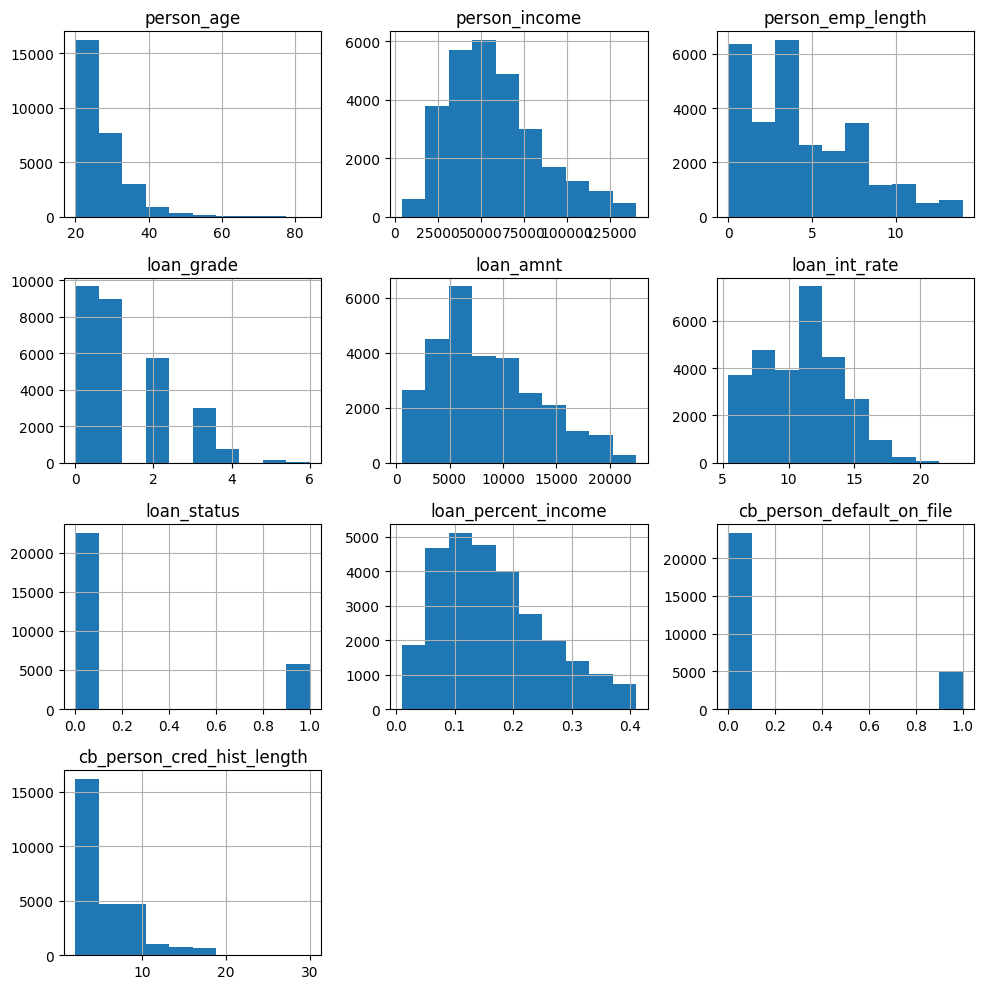

In [ ]:
data.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [ ]:
# since my data is normally distributed im choosing Standard scaler

In [ ]:
std_scaler = StandardScaler()

In [ ]:
data.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,False,False,True,False,False,True,False,False,False,False
5,21,9900,2.0,0,2500,7.14,1,0.25,0,2,False,False,True,False,False,False,False,False,False,True
9,21,10000,6.0,3,1600,14.74,1,0.16,0,3,False,False,True,False,False,False,False,False,False,True
19,24,10800,8.0,1,1750,10.99,1,0.16,0,2,True,False,False,False,False,True,False,False,False,False
23,24,10980,0.0,0,1500,7.29,0,0.14,0,3,False,False,True,False,False,False,False,False,True,False


In [ ]:
num_cols = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_grade','loan_percent_income']

In [ ]:
X_train[num_cols] = std_scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = std_scaler.transform(X_test[num_cols])

In [ ]:
X_train.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
26906,0.435083,2.250344,-1.295368,0.722425,-0.699143,0.987392,-1.337009,1,0.864685,True,False,False,False,False,False,False,False,True,False
17076,-0.895955,0.379974,0.494053,-1.034503,0.952357,-0.991478,0.330316,0,-0.408803,True,False,False,False,False,False,False,False,False,True
4442,-0.230436,-0.495359,-1.295368,0.722425,-0.740430,1.226560,-0.558924,0,-0.918199,False,False,False,True,False,True,False,False,False,False
9492,-0.729575,0.155530,-0.102421,-0.156039,0.250469,-0.559010,-0.114304,0,-0.918199,True,False,False,False,False,False,False,False,False,True
6523,-0.230436,-0.293359,0.494053,-0.156039,-1.112018,-0.326394,-1.114699,0,-0.918199,False,False,True,False,False,True,False,False,False,False


# Simple Vector Machine

In [ ]:
svm = SVC(random_state=40,probability=True)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=40)

In [ ]:
y_pred = svm.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


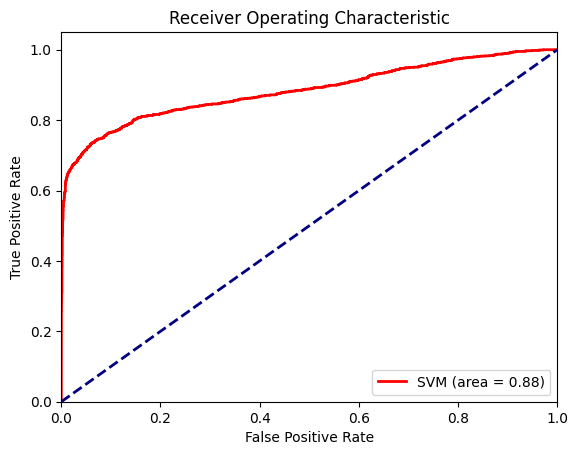

In [ ]:
y_score_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm,pos_label=1)
plt.figure()
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (area = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9176
Precision: 0.9329
Recall: 0.6397
F1 Score: 0.7590


In [ ]:
cm = confusion_matrix(y_test, y_pred)

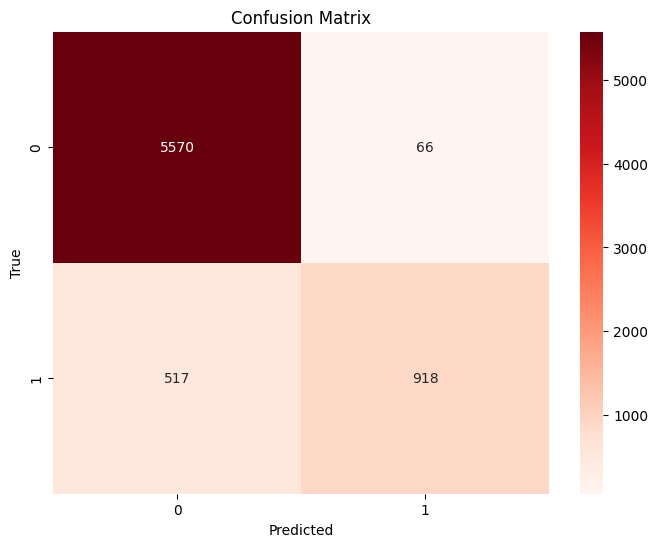

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"Total number of correct predictions = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")

Total number of correct predictions = 6488 out of 7071


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm, X_train, y_train, cv=cv, scoring='accuracy')
print(f"{scores.mean():.4f}  (accuracy)")

0.9103  (accuracy)


# Logistic Regression

In [ ]:
lg = LogisticRegression(random_state=0, multi_class='auto')
lg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = lg.predict(X_test)

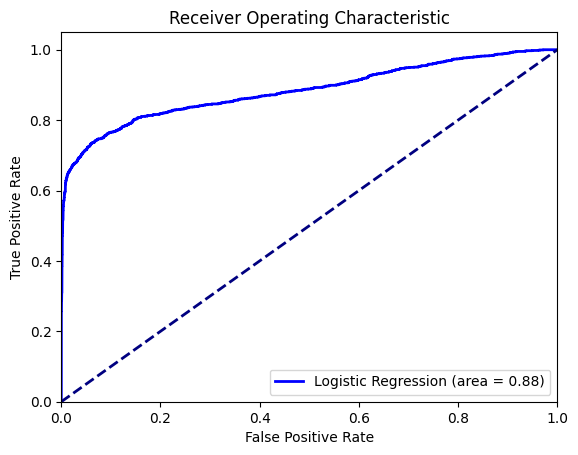

In [ ]:
y_score_lg = svm.predict_proba(X_test)[:, 1]
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_score_svm,pos_label=1)
plt.figure()
roc_auc_lg = auc(fpr_lg, tpr_lg)
plt.plot(fpr_lg, tpr_lg, color='blue', lw=2, label=f'Logistic Regression (area = {roc_auc_lg:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8606
Precision: 0.7443
Recall: 0.4767
F1 Score: 0.5811


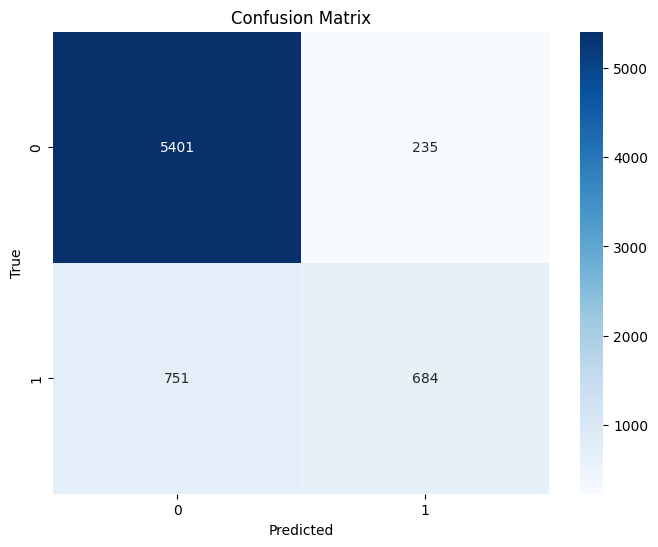

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"Total number of correct predictions = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")

Total number of correct predictions = 6085 out of 7071


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lg, X_train, y_train, cv=cv, scoring='accuracy')
print(f"{scores.mean():.4f}  (accuracy)")

0.8529  (accuracy)


# RANDOM FOREST

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

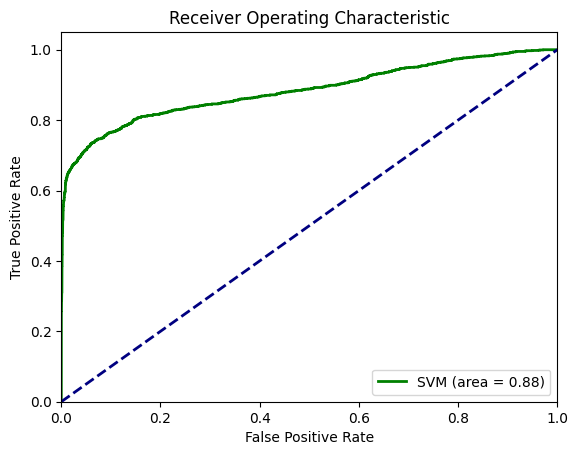

In [ ]:
y_score_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_svm,pos_label=1)
plt.figure()
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'SVM (area = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9369
Precision: 0.9796
Recall: 0.7038
F1 Score: 0.8191


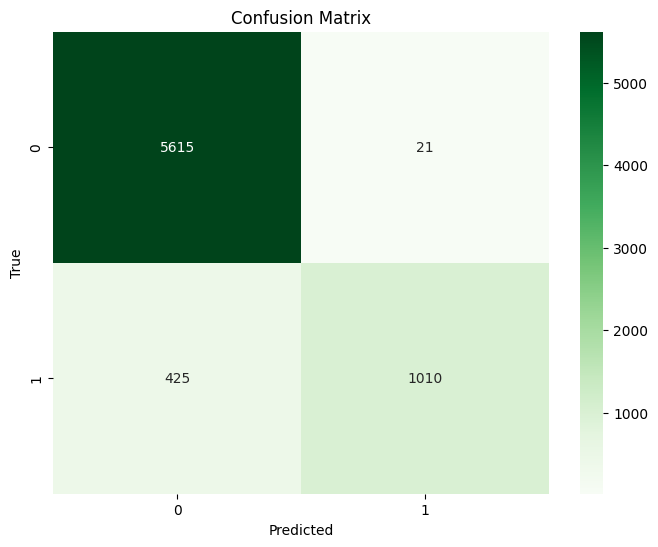

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"Total number of correct predictions = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")

Total number of correct predictions = 6625 out of 7071


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy')
print(f"{scores.mean():.4f}  (accuracy)")

0.9310  (accuracy)


# KNN

In [ ]:
metrics = {'precision': [], 'recall': [], 'f1-score': [], 'accuracy':[]}
k_values = [1,3,5,7,9,11,12,13,15]
for i in k_values:
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Total number of correct predictions when n_neighbors is set to {i} = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")
    # print(cm)
    cr = classification_report(y_test, y_pred,output_dict = True)
    weighted_avg_metrics = cr['weighted avg']
    metrics['precision'].append(weighted_avg_metrics['precision'])
    metrics['recall'].append(weighted_avg_metrics['recall'])
    metrics['f1-score'].append(weighted_avg_metrics['f1-score'])
    acc = accuracy_score(y_test, y_pred)
    metrics['accuracy'].append(acc)

Total number of correct predictions when n_neighbors is set to 1 = 6070 out of 7071
Total number of correct predictions when n_neighbors is set to 3 = 6272 out of 7071
Total number of correct predictions when n_neighbors is set to 5 = 6315 out of 7071
Total number of correct predictions when n_neighbors is set to 7 = 6365 out of 7071
Total number of correct predictions when n_neighbors is set to 9 = 6376 out of 7071
Total number of correct predictions when n_neighbors is set to 11 = 6342 out of 7071
Total number of correct predictions when n_neighbors is set to 12 = 6322 out of 7071
Total number of correct predictions when n_neighbors is set to 13 = 6357 out of 7071
Total number of correct predictions when n_neighbors is set to 15 = 6360 out of 7071


In [ ]:
for i in metrics:
  print(f"{i} : {metrics[i]}")

precision : [0.8558898623530722, 0.8815077684776701, 0.8896579140145116, 0.8982714690086503, 0.9012568612483601, 0.8959983994092631, 0.896564985868282, 0.8993537365407973, 0.9002588079691906]
recall : [0.8584358647998869, 0.8870032527223872, 0.8930844293593551, 0.9001555649837364, 0.9017112148211003, 0.896902842596521, 0.8940743883467684, 0.8990241832838354, 0.8994484514212983]
f1-score : [0.8570439467982534, 0.8810029394008647, 0.8850209248876965, 0.8925017533691831, 0.8934094177505518, 0.8877468995654686, 0.8823187444643793, 0.8896312393435156, 0.8898913683762413]
accuracy : [0.8584358647998869, 0.8870032527223872, 0.8930844293593551, 0.9001555649837364, 0.9017112148211003, 0.896902842596521, 0.8940743883467684, 0.8990241832838354, 0.8994484514212983]


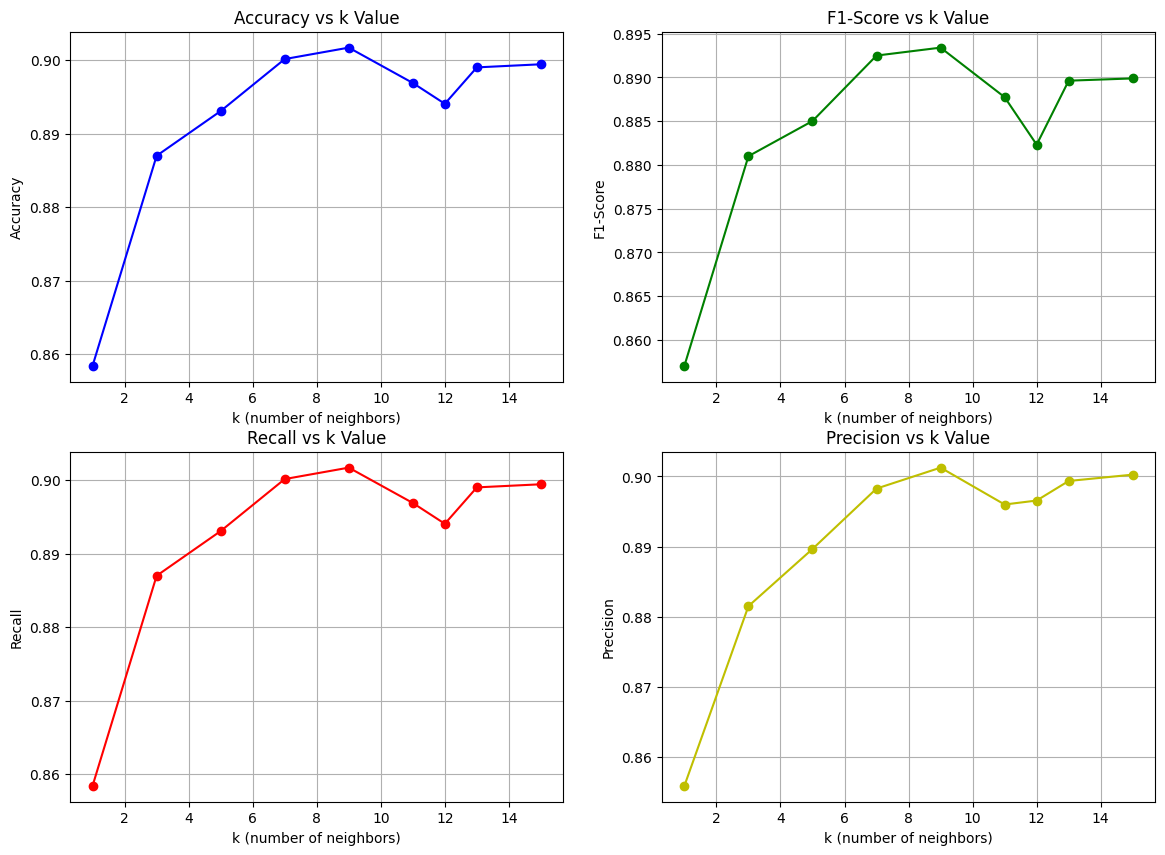

In [ ]:
# Accuracy vs k value
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.plot(k_values, metrics['accuracy'],marker='o',color='b')
plt.title('Accuracy vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)

# f1-score vs k value
plt.subplot(2, 2, 2)
plt.plot(k_values, metrics['f1-score'], marker='o',color='g')
plt.title('F1-Score vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('F1-Score')
plt.grid(True)

# Recall vs k value
plt.subplot(2, 2, 3)
plt.plot(k_values, metrics['recall'], marker='o',color='r')
plt.title('Recall vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Recall')
plt.grid(True)

# Precision vs k value
plt.subplot(2, 2, 4)
plt.plot(k_values, metrics['precision'], marker='o',color='y')
plt.title('Precision vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Precision')
plt.grid(True)

plt.show()

# ROC CURVE

In [ ]:
roc_auc_lg = auc(fpr_lg, tpr_lg)
roc_auc_svm = auc(fpr_svm, tpr_svm)

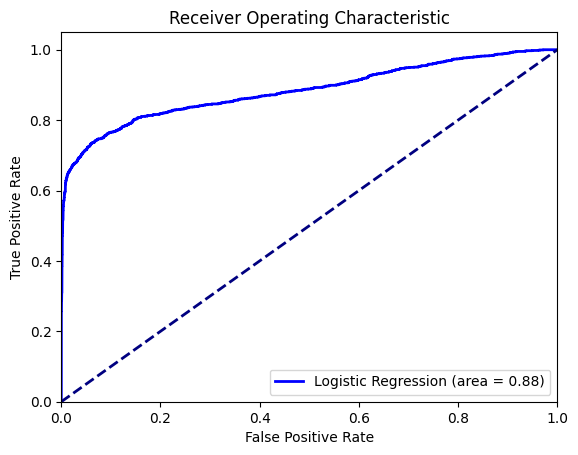

In [ ]:
plt.figure()
plt.plot(fpr_lg, tpr_lg, color='blue', lw=2, label=f'Logistic Regression (area = {roc_auc_lg:.2f})')
# plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (area = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

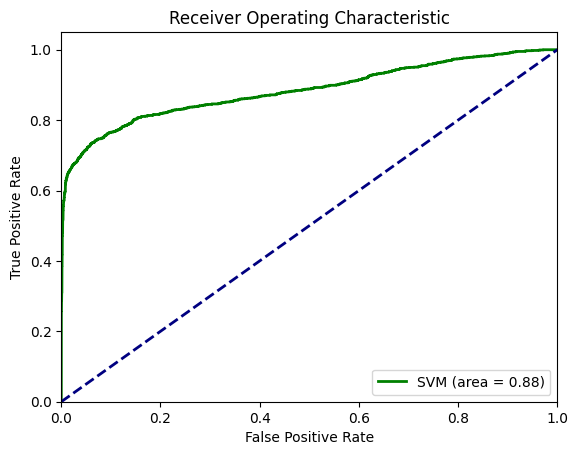

In [ ]:
plt.figure()
# plt.plot(fpr_lg, tpr_lg, color='blue', lw=2, label=f'Logistic Regression (area = {roc_auc_lg:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (area = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# FORWARD SELECTION

In [ ]:
# new_svm = SVC(random_state=42)
# new_knn = KNeighborsClassifier(n_neighbors=1)
# new_lg = LogisticRegression(random_state=42)
# new_tree = RandomForestClassifier(random_state=42)
# models = [new_svm,new_knn,new_lg,new_tree]
# names = ['Simple Vector Machine','K Nearest Neighbors','Logistic Regression','Decision tree']
# # kf = KFold(n_splits=5, shuffle=True, random_state=42)

# for i,model in enumerate(models):
#   remaining_features = list(X_train.columns)
#   the_best_features = []
#   selected_features = []
#   while remaining_features:
#     scores_and_features = []
#     for feature in remaining_features:
#       features_to_try = selected_features + [feature]
#       train_subset = X_train[features_to_try]
#       score = np.mean(cross_val_score(model,train_subset,y_train,cv=KFold(n_splits=5, shuffle=True, random_state=42),scoring='accuracy'))
#       scores_and_features.append((score,feature))

#     scores_and_features.sort(reverse=True)
#     best_score,best_feature = scores_and_features[0]

#     if the_best_features and best_score <= the_best_features[-1][0]:
#       break
#     remaining_features.remove(best_feature)
#     selected_features.append(best_feature)
#     the_best_features.append((best_score,best_feature))

#   best_feature_names = [feature for score,feature in the_best_features]
#   print(f'{names[i]} : Features {best_feature_names}\n{the_best_features}\n\n')